In [20]:
import pandas as pd
import csv
import sqlite3

In [21]:
df_analysis = pd.read_csv('analysis_data.csv') #downloading csv-files
df_groups = pd.read_csv('groups_data.csv')

In [22]:
con = sqlite3.connect("research.db") #creating database
cur = con.cursor()

In [23]:
df_analysis.to_sql(name='speakers', con=con, if_exists='replace') #The table contains vowel duration data by speakers (participants of the experiment).
df_groups.to_sql(name='groups', con=con, if_exists='replace') #The table contains words classification by groupes of the reduced vowels' position.

In [24]:
#query №1. The aim is to check the longest redused vowels' duration in database. First, one can see max-duration; second, this query gives information about positions of the sounds (in all the cases it is the end of the word). 

cur.execute('SELECT word, duration FROM speakers ORDER BY duration DESC LIMIT 5')
print(cur.fetchall())

[('што́тъ', 0.052396071978719996), ('што́л’ь', 0.04967128657084901), ('э́тът', 0.048566795191439), ('э́тът', 0.047856937397550994), ('кан’е́шнъ', 0.04631847792586)]


In [25]:
#query №2. Here one can get information about speakers who are younger than 18 y. o. (speakers 6, 9 and 10).

cur.execute('SELECT DISTINCT speaker FROM speakers WHERE age < 18')
print(cur.fetchall())

[(6,), (9,), (10,)]


In [26]:
#query №3. The result of the query illustrates id of the male speakers. 

cur.execute('SELECT DISTINCT speaker FROM speakers WHERE gender = \'m\' ')
print(cur.fetchall())

[(1,), (2,), (4,), (8,), (10,)]


In [27]:
#query №4. The result demonstrates all the word of pre-stressed reduced vowels after non-palatalized consonant in the database. This groups of redused vowels named as 5 in column group_id.

cur.execute('SELECT word FROM groups WHERE group_id = 5')
print(cur.fetchall())

[('пъзван’у́',), ('дъвышто́',), ('хърашо́',), ('пр’Ьхажа́н’ьн',), ('вЪсказа́л’ь',), ('нъ̊дава́и̯т’ь',), ('н’Ьпр’ьпъм’ина́и̯ь',), ('съ̊ицы́т',), ('зЪдава́и̯т’ь',), ('н’ьпр’ьпЪм’ина́и̯ь',), ('нъ̊вапщ’е́',), ('дъмЪфстр’ич’а́л’ьс’',), ('дЪмъфстр’ич’а́л’ьс’',), ('нъ̊!дава́и̯т’ь',), ('дамЪфстр’ич’а́л’ьс’',), ('дъшто́вы',), ('н’ьпр’ьпЪм’ина́и̯ъ',), ('нь̊мЪфстр’ич’а́л’ьс’',), ('мЪфстр’ич’а́л’ьс’',), ("пъзван’ит'ь",), ('нь̊мъфстр’ич’а́л’ьс’',)]


In [28]:
#query №5. The output of the query provides information about amount of pre-stressed reduced vowels after palatalized consonant in database (which is named as 1 in column group_id)

cur.execute('SELECT COUNT(word) FROM groups WHERE group_id = 1')
print(cur.fetchall())

[(12,)]


In [29]:
#query №6.1. The aim of the work was to compare the durations of the reduces vowels in reading and spontaneous speech conditions. The query 6.1 is aimed to get information about vowel duration of female speakers in reading condition.

cur.execute('SELECT AVG(duration) FROM speakers WHERE gender = \'f\' AND condition = 0')
print(cur.fetchall())

[(0.032297816497995346,)]


In [30]:
#query №6.2. The query 6.2 is aimed to get information about vowel duration of female speakers in speaking condition. One can easily compare results of queries 6.1 and 6.2.

cur.execute('SELECT AVG(duration) FROM speakers WHERE gender = \'f\' AND condition = 1')
print(cur.fetchall())

[(0.02824213973965028,)]


In [31]:
! pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 283 kB 2.9 MB/s eta 0:00:01


Text(0, 0.5, 'Words count')

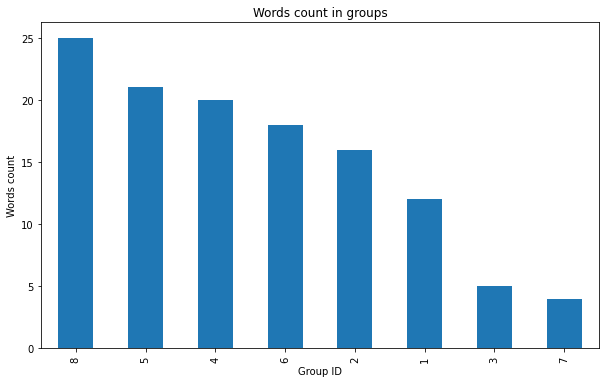

In [32]:
#The barplot illustrates the total number of the words by group of reduced vowel.

df_groups.group_id.value_counts().plot(figsize=(10,6), kind='bar')
plt.title('Words count in groups')
plt.xlabel('Group ID')
plt.ylabel('Words count')

Text(0.5, 1.0, 'Words count by speaker')

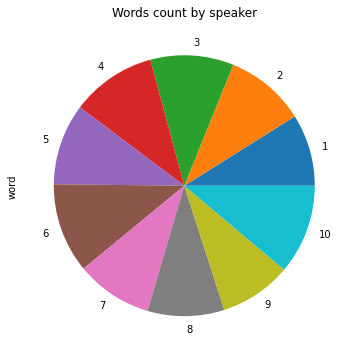

In [33]:
#The pie chart demontrates the distribution of the total amount of words pronounced by speaker. The amount of words approximately equal for each speaker.

df_analysis.groupby('speaker').word.count().plot(figsize=(10,6), kind='pie')
plt.title('Words count by speaker')


Text(0.5, 1.0, 'Duration boxplot by speaker')

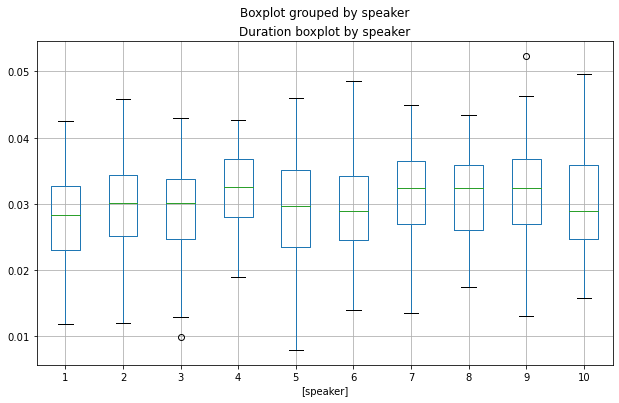

In [34]:
#I want to get information of the distribution of duration by each speaker; boxplots are perfect solution for this case. 


df_analysis.boxplot(by=['speaker'], column='duration', figsize=(10,6))
plt.title('Duration boxplot by speaker')


Text(0.5, 1.0, 'Speaker average duration by condition')

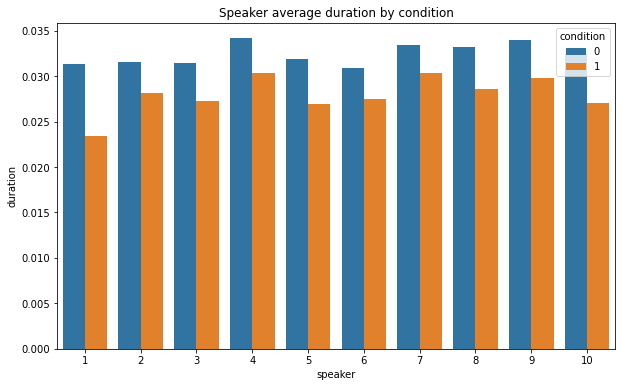

In [35]:
#My aim was to compare reduced vowels duration by condition (reading or speaking) for every speaker. That is why I chose doubled barplots.

df2 = df_analysis.groupby(['condition','speaker'], as_index=False).duration.mean()
plt.figure(figsize=(10,6))
sns.barplot(x = 'speaker', y = 'duration', hue = 'condition', data = df2)
plt.title('Speaker average duration by condition')


In [ ]:
##Formulated idea for the final project: 
#My main goal is to collect a database of 10-15 texts (classical Russian literature; school curriculum; grades 10-11). The parameters (columns) will be characteristics of the text (year of publication, amount of the words, author, number of unique words, etc.). Book rating will be considered as an additional parameter. To get the rating, I will send the eleventh-graders of the HSE Lyceum a survey in which they will have to rate the overall impression of the book from 1 (I hate this book) to 10 (I will learn every word from the book by heart). Based on the data, I visualize the parameters of the texts; provide top-5 books from the Russian school curriculum (maybe I will find an explanation: length or year parameters may influence the 'mark'); suggest which books are better not to read with students; make some exercises for the classes (for instance, guesing the book by the most frequent words). If you have any other suggestion, I am looking forward to getting them!